In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
RNA = pd.read_csv("RNAexpression_combat_primaryonly_gender_nonparam.csv", sep="\t")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1019) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
RNA.GenX.nunique()

58277

In [7]:
RNA_RAW = pd.read_csv("Lung_GeneExpression.txt", sep="\t")

In [23]:
RNA_RAW.Start = RNA_RAW.Start.astype(str)
RNA_RAW.Stop = RNA_RAW.Stop.astype(str)
RNA_RAW.Strand = RNA_RAW.Strand.astype(str)
RNA_RAW['GenX'] = RNA_RAW[['Gene', 'Chr', 'Start', 'Stop', 'Strand']].apply(lambda x: ".".join(x), axis=1)
RNA_RAW['GenX2'] = RNA_RAW[['Gene', 'Chr', 'Start', 'Stop']].apply(lambda x: ".".join(x), axis=1)

In [10]:
Methylation = pd.read_csv("methylation_combat_genderCovar.csv", sep="\t", index_col=0)
Methylation_T = Methylation.T

In [17]:
Methylation_RAW = pd.read_csv("Lung_Methylation.txt", sep="\t", index_col=0)
Methylation_RAW.drop(['Chr', 'Start', 'Stop', 'Strand', 'Gene', 'Relation_CpG_Island'], axis=1, inplace=True)
Methylation_RAW_T = Methylation_RAW.T

In [18]:
Methylation_RAW_T.head()

probeID,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
TCGA-44-4112-01,0.34335,NaN,NaN,0.48315,0.85435,0.66545,0.67345,0.5148,0.58025,0.02055,...,0.04255,0.0288,0.4513,0.54115,0.93405,0.5270,0.51955,0.5179,0.46275,0.93145
TCGA-NJ-A4YP-01,0.39920,NaN,NaN,0.54910,0.76320,0.52260,0.54670,0.3547,0.46650,0.02600,...,0.06490,0.9110,0.7770,0.53440,0.52450,0.6257,0.52800,0.9245,0.12400,0.80520
TCGA-22-4613-01,0.30730,NaN,NaN,0.66970,0.91440,0.75650,0.39790,0.4598,0.20740,0.00990,...,0.97290,0.9820,0.6239,0.52180,0.36430,0.9680,0.33350,0.5314,0.50640,0.37820
TCGA-90-7769-01,0.12450,NaN,NaN,0.75360,0.93800,0.70860,0.84760,0.6568,0.23610,0.01260,...,0.97310,0.9733,0.9158,0.01460,0.96910,0.3486,0.95740,0.7698,0.33670,0.49390
TCGA-77-A5G1-01,0.34700,NaN,NaN,0.30370,0.89910,0.77020,0.76900,0.3012,0.27600,0.01490,...,0.01670,0.0126,0.4764,0.50550,0.96980,0.9468,0.48070,0.5084,0.43300,0.73770


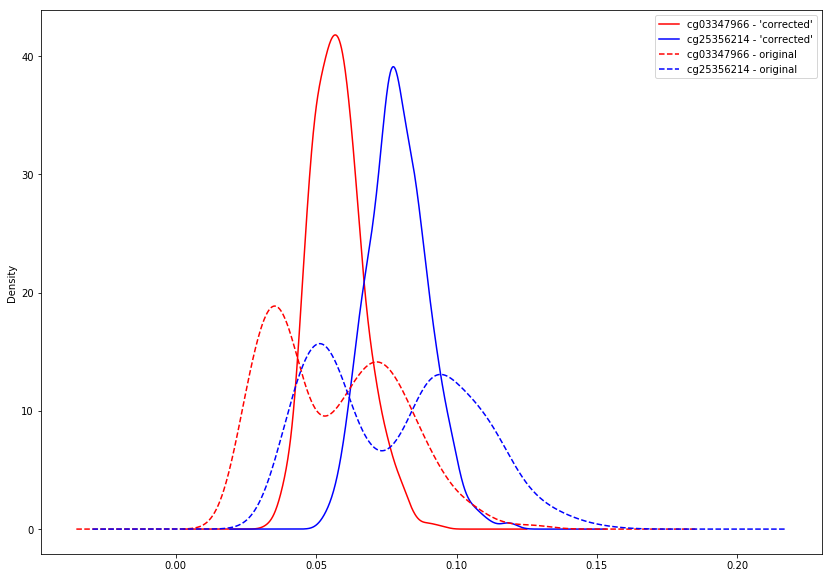

In [30]:
# cg03347966 sep
# cg14338114 not sep
# cg25356214 sep

Methylation_T.cg03347966.plot.kde(label="cg03347966 - 'corrected'", color='red', figsize=(14,10))
Methylation_T.cg25356214.plot.kde(label="cg25356214 - 'corrected'", color='blue')
#Methylation_T.cg14338114.plot.kde(label='cg14338114 - corrected')

Methylation_RAW_T.cg03347966.plot.kde(label='cg03347966 - original', color='red', linestyle='--')
Methylation_RAW_T.cg25356214.plot.kde(label='cg25356214 - original', color='blue', linestyle='--')
#Methylation_T.cg14338114.plot.kde(label='cg14338114 - original')
plt.legend()

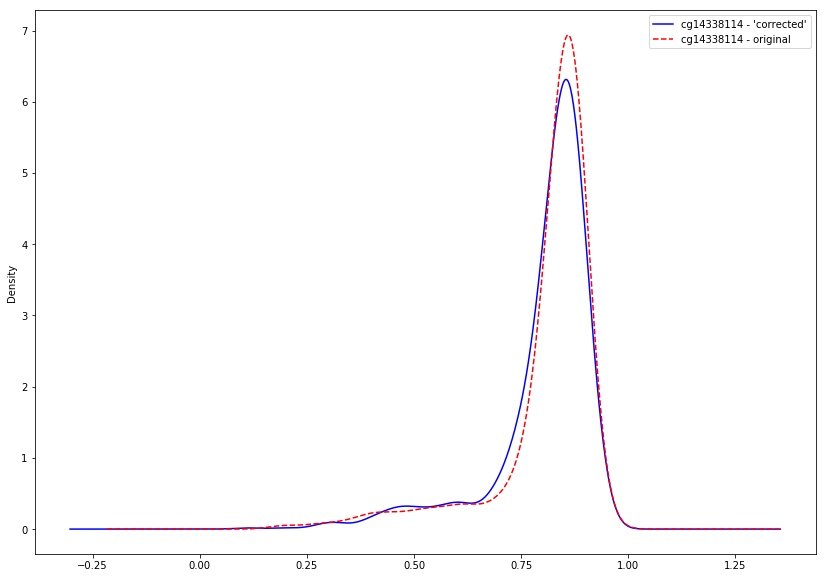

In [32]:
Methylation_T.cg14338114.plot.kde(label="cg14338114 - 'corrected'", color='blue', figsize=(14,10))
Methylation_RAW_T.cg14338114.plot.kde(label='cg14338114 - original', color='red', linestyle='--')
plt.legend()